# ML in Cybersecurity: Task I

## Team
  * **Team name**:  ESS
  * **Members**: Eiram Mahera Sheikh (eish00001@stud.uni-saarland.de), Shravan Swaminathan(shsw00001@stud.uni-saarland.de), Shayari Bhattacharjee(shbh00002@stud.uni-saarland.de)


## Logistics
  * **Due date**: 11th November 2021, 23:59:59 (email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland)
  * Please include your team name and the task number in the file name and the email subject
  * Complete this in **teams of 3**
  * Feel free to use the forum or the mailing list to find group members.
  
## Timeline
  * 29-Oct-2021: Task 1 hand-out
  * **11-Nov-2021** (23:59:59): Email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland
  * 12-Nov-2021: Task 1 discussion and summary
  
  
## About this task
In this task, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this task are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this task will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your task report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [1]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML

#custom print control
customPrints = False
debugPrints = False
temporaryTest = False
interactivePrints = False
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [2]:
import itertools

# Load pytorch modules
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as tvdataset

# Load sklearn modules
import sklearn
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Set random seed to have reproducible results
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# set pandas display option
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)

Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [3]:
def identity_func(foo):
    return foo


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)
      

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets
def vis_predictions(x_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('predicted label: {0}'. format(y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  


# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint train, val, and test splits!

In [4]:
# fetch the MNIST dataset
mnist = datasets.fetch_openml("mnist_784")

# split the dataset into 80% trainval and 20% test set
(x_trainval, x_test, y_trainval, y_test) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.20, random_state=random_seed)

print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

# Make the inputs Nx28x28
x_trainval_3d = x_trainval.reshape(x_trainval.shape[0], 28, 28)
x_test_3d = x_test.reshape(x_test.shape[0], 28, 28)

print('x_trainval_3d.shape = {},  y_trainval.shape = {}'.format(x_trainval_3d.shape, y_trainval.shape))
print('x_test_3d.shape = {},  y_test.shape = {}'.format(x_test_3d.shape, y_test.shape))

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
x_trainval = x_trainval[:int(len(x_trainval)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]
x_trainval_3d = x_trainval_3d[:int(len(x_trainval_3d)*DEBUG_FRAC)]

x_trainval.shape = (56000, 784),  y_trainval.shape = (56000,)
x_test.shape = (14000, 784),  y_test.shape = (14000,)
x_trainval_3d.shape = (56000, 28, 28),  y_trainval.shape = (56000,)
x_test_3d.shape = (14000, 28, 28),  y_test.shape = (14000,)


#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

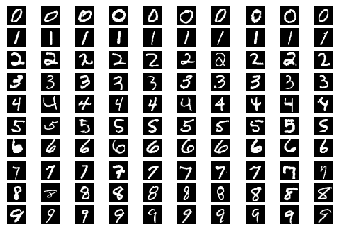

In [ ]:
# Visualize 10 examples of 10 classes. You can extend the following code:
rows, cols = 10, 10
fig, ax = plt.subplots(nrows = rows, ncols = cols)

# loop for each class label
for class_label in np.arange(0, 10):

  # find which points in the dataset belong to the class_label
  indices = np.where(y_trainval==str(class_label))[0]

  # randomly select 10 samples
  random_indices = np.random.choice(indices, 10)

  # plot the samples
  for axis, image in zip(ax[class_label], x_trainval_3d[random_indices]):
    axis.set_axis_off()
    axis.imshow(image)

plt.savefig('fig1.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# You can see an output example in the follow:

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: *K-Nearest Neighbours* (25 points)

K-Nearest Neighbours is a non-parametric learning algorithm. We have used K-Nearest Neighbors as our first model. Our main reason for using this model is that it uses a very simple approach to classification and yet produces results close to Bayes optimal classifier by estimating class conditional probabilities.

### 2.1.1: Hyper-parameters
Define hyper-parameters for your model here

**n_neighbors:** Number of neighbors to use by default for kneighbors queries.

**weights:** Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

**algorithm:** Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


**leaf_size:** Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

**p:** Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

**metric:** The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of DistanceMetric for a list of available metrics. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.


***Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html***

In [5]:
# Hyper-parameters
neighbors = np.asarray([1, 5, 10])                                          # number of nearest neighbors
weights = np.asarray(["uniform", "distance"])                               # weight function used in prediction
algorithm = np.asarray(["auto", "ball_tree", "kd_tree", "brute"])           # algorithm used to compute the nearest neighbors
metric = np.asarray(["euclidean", "manhattan", "chebyshev", "minkowski"])   # distance metric to use for the tree
leaf_size = np.asarray([20, 30])                                            # leaf size required for kd_tree and ball_tree algorithms
power = np.asarray([1, 2])                                                  # power parameter

test_set = 'train'  #  or 'test'

if test_set == 'val':
    train_size = int(x_trainval.shape[0] * 0.8) # set train size to 80% of trainval
    train_idxs, val_idxs = np.arange(0, train_size), np.arange(train_size + 1, x_trainval.shape[0])
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.1.2: Data Preprocessing


In [6]:
# to speed up training of models
x_trainval_scaled = preprocessing.scale(x_trainval)
x_train_scaled = preprocessing.scale(x_train)
x_eval_scaled = preprocessing.scale(x_eval)

### 2.1.3: Model

Define your model here

In [7]:
knn_models = []

# for each combination of hyper paramters, define a model
for k, w, a, m, l, p in itertools.product(neighbors, weights, algorithm, metric, leaf_size, power):
  knn_models.append({
      "model": KNeighborsClassifier(n_neighbors=k, weights=w, algorithm=a, metric=m, leaf_size=l, p=p),
  })


### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [8]:
# train the model
for model in knn_models:
  model["fit"] = model["model"].fit(x_train_scaled, y_train)

### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [ ]:
# Model evaluation with different paramters

accuracy = [] # list to store model accuracies for all hyper-paramters

# for each model make predictions and calculate train and eval accuracy
for model in knn_models:

  # make predictions
  y_pred = model["model"].predict(x_eval_scaled)

  # calculate train and test accuracy
  train_score = np.round(model["model"].score(x_train_scaled, y_train) * 100, 2) 
  eval_score = np.round(model["model"].score(x_eval_scaled, y_eval) * 100, 2)

  # store accuracy and hyper-paramters
  accuracy.append({
      "train_accuracy": train_score,
      "eval_accuracy": eval_score,
      **model["model"].get_params() 
  })

accuracy_df = pd.DataFrame(accuracy)


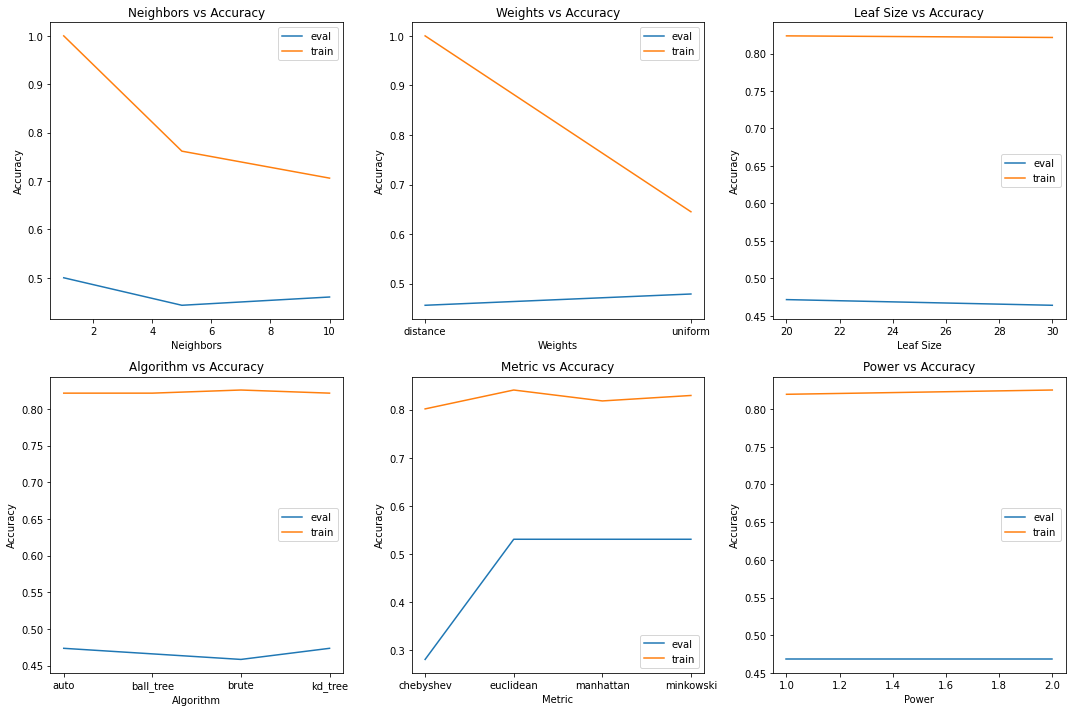

In [ ]:
# for each parameter plot test and train accuracies

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

plot_params = {
    "n_neighbors": "Neighbors",
    "weights": "Weights",
    "leaf_size": "Leaf Size",
    "algorithm": "Algorithm",
    "metric": "Metric",
    "p": "Power",
}

for ax, param, name in zip(axis.flat, plot_params.keys(), plot_params.values()):
  df = accuracy_df.groupby(param, as_index=False).mean()
  ax.plot(df[param], df["eval_accuracy"]/100, label="eval")
  ax.plot(df[param], df["train_accuracy"]/100, label="train")
  ax.set_title(name + " vs Accuracy")
  ax.set(xlabel=name, ylabel="Accuracy")
  ax.legend()

fig.tight_layout()


In [3]:
# find the best model
best_accuracy_idx = accuracy_df["eval_accuracy"].idxmax()

best_accuracy = accuracy_df.loc[best_accuracy_idx]
print("Best accuracy:") 
print(best_accuracy)


Best accuracy:
94.59


In [ ]:
# train the best model on entire data set
best_knn_model = knn_models[best_accuracy_idx]["model"].fit(x_trainval, y_trainval)

# save the best model
knn_pickle = open('knn_model', 'wb')  
pickle.dump(best_knn_model, knn_pickle)

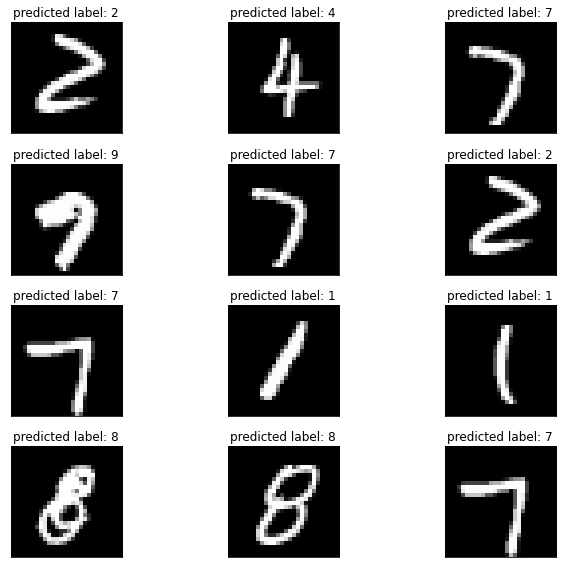

In [ ]:
# load the model from disk
knn_model = pickle.load(open('knn_model', 'rb'))

# make predictions
y_pred = knn_model.predict(x_eval)

# visualise predictions
vis_predictions(x_eval, y_pred, len(y_pred))


### 2.1.6: Summary

Summarize your findings:

**Which hyper-parameters were important and how did they influence your results?**

The number of nearest neighbors (k) used for making a classification decision is the most important paramter for the K-Nearest neighbors algorithm.

The influnce of other parameters is listed below:

***Weights:*** Uniform weights show worse performance on training data. However, both distance and uniform weights have similar accuracy on test data.

***Algorithm:*** all the four types of algorithm gave similar results on both train and test data separately.

***Metric:*** minkowski and euclidean metrics give best accuracy. chebyshev is not a good metric for the mnist dataset.

***Power:*** using power value of 2 gave better results.

***Leaf Size:*** A Leaf size of 20 appears to be a better choice for our data.



**What were other design choices you faced?**

The default value of paramters provided by the sklearn.neighbor.KNeighborsClassifier() model class also gives best accuracy. We only need to find out the best value for k.




# 2.2: Model [M2]: SVM (25 points)

In the section 2.1, a few Support Vector Machine models are used to classify the MNIST dataset. SVM being a supervised machine learning algorithm proves to be quite robust in classification problems. After having visualized the data sets in 2d(28x28) and 1d (,784), we could imagine drawing a hyperplane that makes the distinction between 2 or more classes of data. The degree of the hyperplane can be of higher order as well. This droves us to use different kernels such as a RBF and the polynomial kernals on the SVM model to evaluate prediction accuracy as one of the training models. 

**Linear model**
For the linear kernel, we'd train the models with 2 values of C [0.1, 1]

**RBF Kernel model**
For the rbf kernel, we'd train models with C as [0.01, 0.1, 1, 10] and gamma with [0.0001, 0.001, 0.01, 0.1, 1, 10] and all possible permutation of these hyper parameters. 

**Polynomial Kernel model**
For the polynomial kernel, we'd train models with [0.01, 0.1, 1, 10] and gamma with [0.0001, 0.001, 0.01, 0.1, 1, 10], degrees 1 to 7 and all possible permutation of these hyper parameters


**Understanding C** - 
The trade-off while training an SVM model as I’ve understood is to increase the distance of the decision boundary to the classes at the same time maximize the number points that are correctly classified. A decision boundary might have to be very close to one particular class to correctly classify all the data sets in the training set however accuracy on the test dataset might be lower because decision boundary is too sensitive to noise and to small changes in the independent variables. The contrary would lead to increase in misclassified exceptions. This trade-off is defined by C. Larger the C, larger is the penalty for wrong classification therefore resulting in a decision boundary with a smaller margin. 

**Understanding Gamma** – 
As we already guessed, a linear hyperplane would not be the way to go for classifying the dataset under question. The low value of gamma results in a large similarity radius which in turns means more points are grouped together. The larger the gamma, the points that are closely together are considered the same class. Keeping gamma on the lower side prevents overfitting from what we observed and we counteracted this by reducing the gamma thereby generalizing.


### 2.2.1: Hyper-parameters


In [ ]:
# Hyper-parameters

c_values_linear = [0.1, 1]

c_values_rbf = [0.01, 0.1, 1, 10]
gamma_values_rbf = [0.0001, 0.001, 0.01, 0.1, 1, 10]

c_values_poly = [0.01, 0.1, 1, 10]
gamma_values_poly = [0.0001, 0.001, 0.01, 0.1, 1, 10]
degree_poly = range(1,7)

# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

test_set = 'val'  #  or 'test'

if test_set == 'val':
    train_size = int(x_trainval.shape[0] * 0.8)  # set train size to 80% of trainval
    train_idxs, val_idxs = np.arange(0, train_size), np.arange(train_size + 1, x_trainval.shape[0])
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test


### 2.2.2: Data Preprocessing


In [ ]:
# to speed up training of models
x_trainval_scaled = preprocessing.scale(x_trainval)
x_train_scaled = preprocessing.scale(x_train)
x_eval_scaled = preprocessing.scale(x_eval)

### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1) Copy paste it here as well

In [ ]:
svm_models = {
    'linear' : [],
    'rbf'    : [],
    'poly'   : []
    }

# define linear svm models
for c in c_values_linear:
  svm_models["linear"].append({
      "C": c,
      "model": svm.SVC(kernel="linear", C=c, random_state=random_seed)
      })

# define rbf models
for c, g in itertools.product(c_values_rbf, gamma_values_rbf):
  svm_models["rbf"].append({
      "C": c,
      "gamma": g,
      "model": svm.SVC(kernel="rbf", gamma=g, C=c, random_state=random_seed)
      })

# define polynomial models
for c, g, d in itertools.product(c_values_rbf, gamma_values_rbf, degree_poly):
  svm_models["poly"].append({
      "C": c,
      "gamma": g,
      "degree": d,
      "model": svm.SVC(kernel="poly", degree=d, gamma=g, C=c, random_state=random_seed)
      })



### 2.2.4: Fit Model


In [ ]:
for models in svm_models.values():
  for model in models:
    model["model"].fit(x_train_scaled, y_train)

### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [ ]:
# Model evaluation with different paramters

accuracy = []

for models in svm_models.values():
  for model in models:
      y_predict = model["model"].predict(x_eval_scaled)
      score = np.round(accuracy_score(y_eval, y_predict), 2)
      model["accuracy"] = score

      # store accuracy and hyper-paramters
      params = model["model"].get_params()
      accuracy.append({
          "accuracy": score,
          "kernel": params.get("kernel"),
          "C": params.get("C"),
          "gamma": params.get("gamma"),
          "degree": params.get("degree"),
      })

accuracy_df = pd.DataFrame(accuracy)
print(accuracy_df)



     accuracy  kernel      C   gamma  degree
0        0.90  linear   0.10   scale       3
1        0.90  linear   1.00   scale       3
2        0.11     rbf   0.01  0.0001       3
3        0.11     rbf   0.01   0.001       3
4        0.11     rbf   0.01    0.01       3
..        ...     ...    ...     ...     ...
165      0.92    poly  10.00      10       2
166      0.92    poly  10.00      10       3
167      0.84    poly  10.00      10       4
168      0.79    poly  10.00      10       5
169      0.69    poly  10.00      10       6

[170 rows x 5 columns]


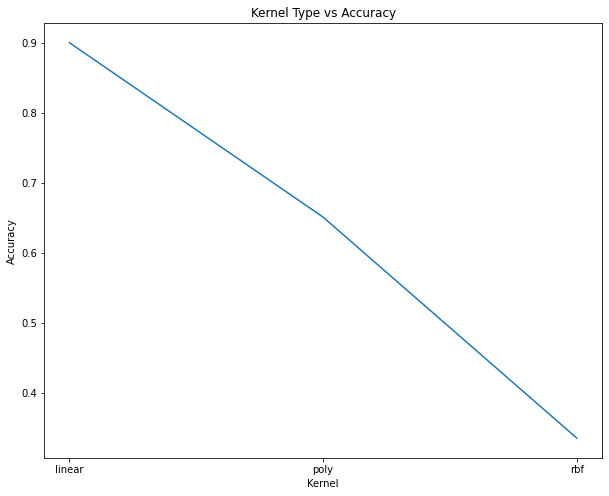

In [ ]:
# plot mean accuracy for each kernel type
ka = accuracy_df.groupby("kernel")["accuracy"].mean().to_dict()
plt.plot(list(ka.keys()), list(ka.values()))
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.title("Kernel Type vs Accuracy")
plt.show()


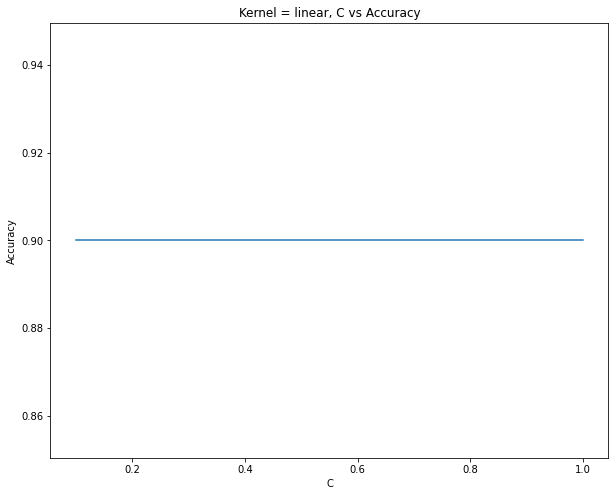

In [ ]:
accuracies = {k: v for k, v in accuracy_df.groupby("kernel")}

# plot accuracy for linear svm models
plt.plot(accuracies["linear"]["C"], accuracies["linear"]["accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Kernel = linear, C vs Accuracy")
plt.show()

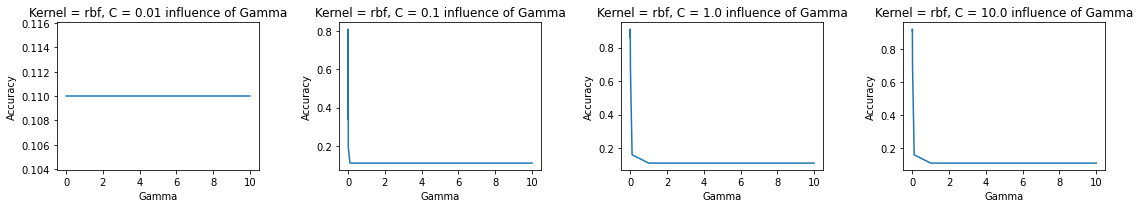

In [ ]:
# Plot the influence of gamma for each value of C
rbf_c_accuracies = {k: v for k, v in accuracies["rbf"].groupby("C")}

fig, axis = plt.subplots(1, 4, figsize=(16, 3))

for ax, c, df in zip(axis.flat, rbf_c_accuracies.keys(), rbf_c_accuracies.values()):
  ax.plot(df["gamma"], df["accuracy"])
  ax.set_title("Kernel = rbf, C = {} influence of Gamma".format(c))
  ax.set(xlabel="Gamma", ylabel="Accuracy")

fig.tight_layout()


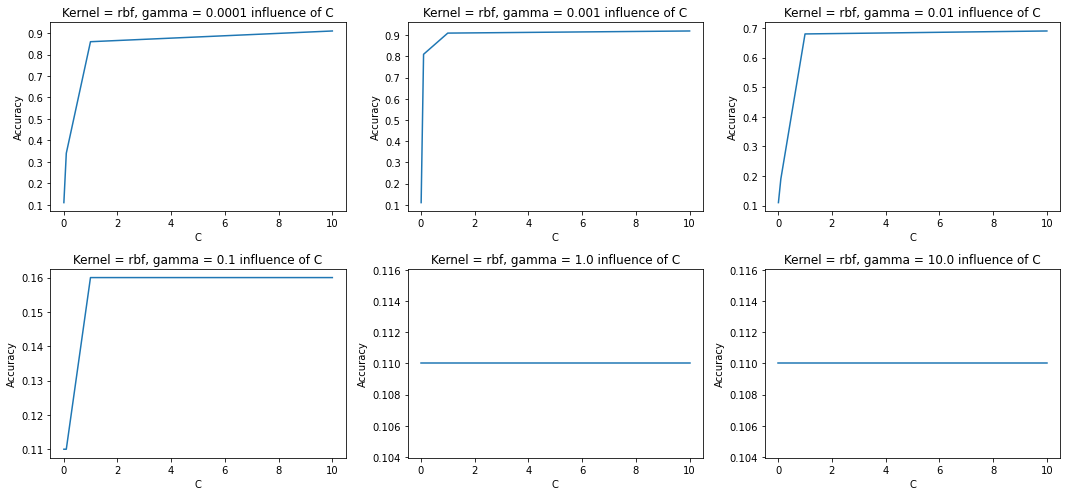

In [ ]:
# Plot the influence of c for each value of gamma
rbf_gamma_accuracies = {k: v for k, v in accuracies["rbf"].groupby("gamma")}

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

for ax, g, df in zip(axis.flat, rbf_gamma_accuracies.keys(), rbf_gamma_accuracies.values()):
  ax.plot(df["C"], df["accuracy"])
  ax.set_title("Kernel = rbf, gamma = {} influence of C".format(g))
  ax.set(xlabel="C", ylabel="Accuracy")

fig.tight_layout()


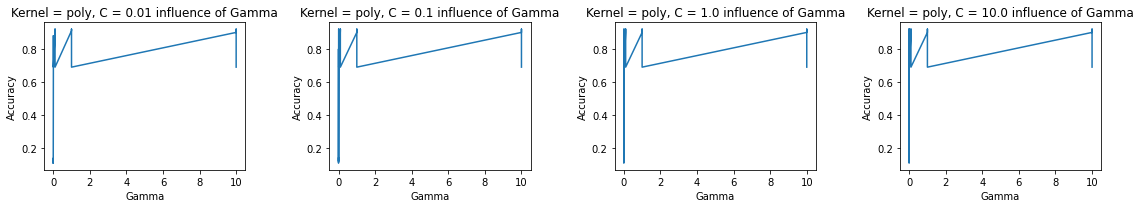

In [ ]:
# Plot the influence of gamma for each value of C
poly_c_accuracies = {k: v for k, v in accuracies["poly"].groupby("C")}

fig, axis = plt.subplots(1, 4, figsize=(16, 3))

for ax, c, df in zip(axis.flat, poly_c_accuracies.keys(), poly_c_accuracies.values()):
  ax.plot(df["gamma"], df["accuracy"])
  ax.set_title("Kernel = poly, C = {} influence of Gamma".format(c))
  ax.set(xlabel="Gamma", ylabel="Accuracy")

fig.tight_layout()


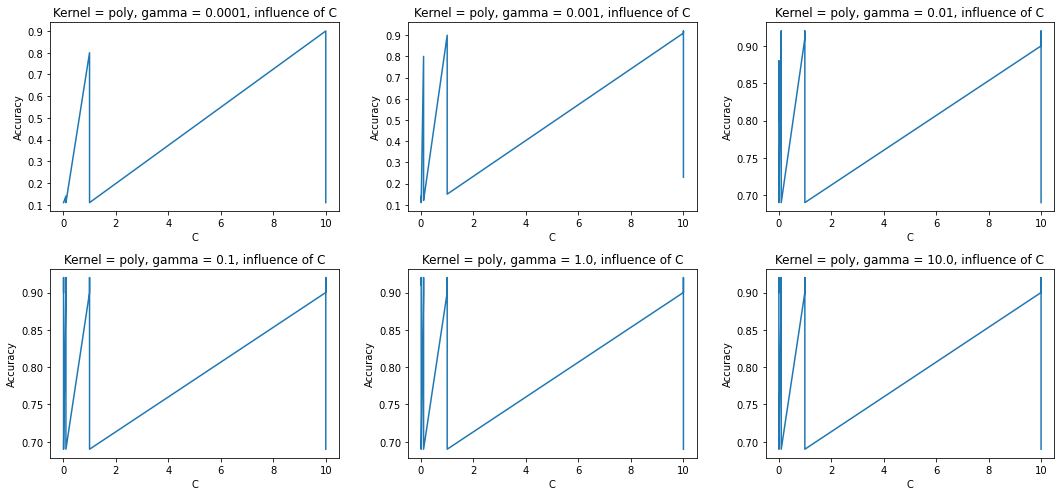

In [ ]:
# Plot the influence of gamma for each value of C
poly_gamma_accuracies = {k: v for k, v in accuracies["poly"].groupby("gamma")}

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

for ax, g, df in zip(axis.flat, poly_gamma_accuracies.keys(), poly_gamma_accuracies.values()):
  ax.plot(df["C"], df["accuracy"])
  ax.set_title("Kernel = poly, gamma = {}, influence of C".format(g))
  ax.set(xlabel="C", ylabel="Accuracy")

fig.tight_layout()

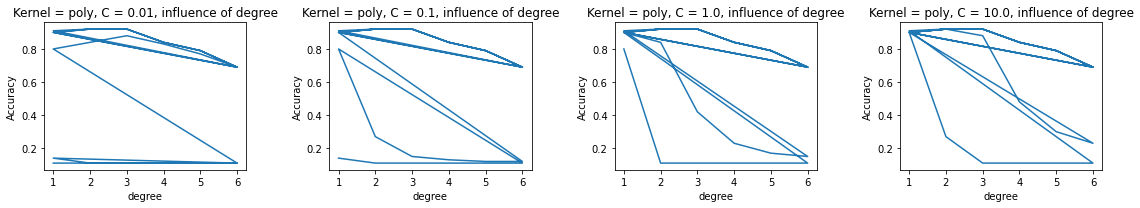

In [ ]:
# Plot the influence of degree for each value of C
poly_c_accuracies = {k: v for k, v in accuracies["poly"].groupby("C")}

fig, axis = plt.subplots(1, 4, figsize=(16, 3))

for ax, c, df in zip(axis.flat, poly_c_accuracies.keys(), poly_c_accuracies.values()):
  ax.plot(df["degree"], df["accuracy"])
  ax.set_title("Kernel = poly, C = {}, influence of degree".format(c))
  ax.set(xlabel="degree", ylabel="Accuracy")

fig.tight_layout()

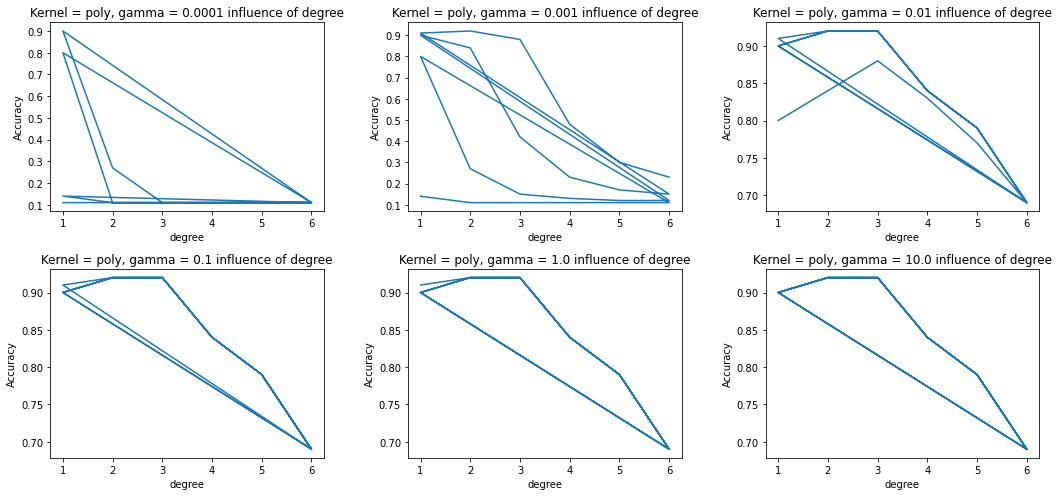

In [ ]:
# Plot the influence of degree for each value of gamma
poly_gamma_accuracies = {k: v for k, v in accuracies["poly"].groupby("gamma")}

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

for ax, g, df in zip(axis.flat, poly_gamma_accuracies.keys(), poly_gamma_accuracies.values()):
  ax.plot(df["degree"], df["accuracy"])
  ax.set_title("Kernel = poly, gamma = {} influence of degree".format(g))
  ax.set(xlabel="degree", ylabel="Accuracy")

fig.tight_layout()

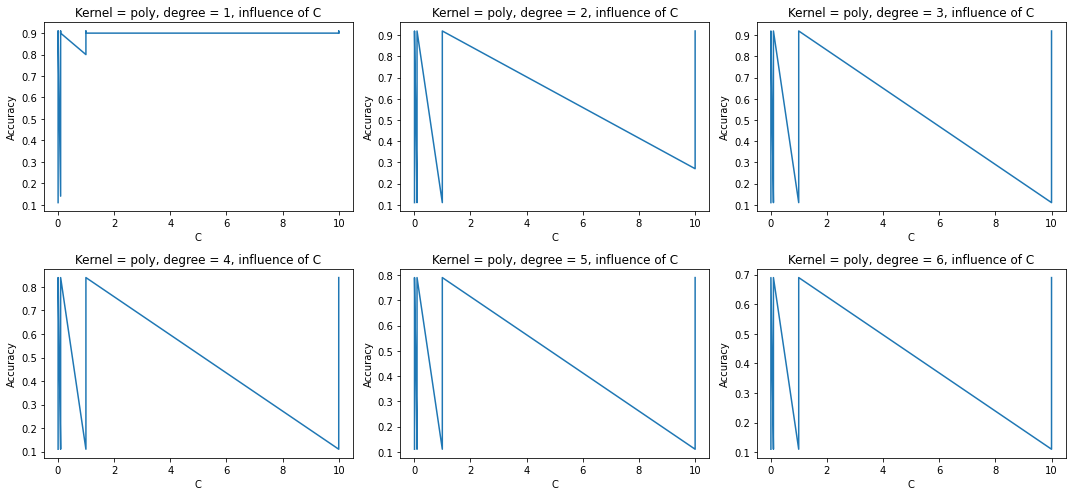

In [ ]:
# Plot the influence of C for each value of degree
poly_degree_accuracies = {k: v for k, v in accuracies["poly"].groupby("degree")}

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

for ax, d, df in zip(axis.flat, poly_degree_accuracies.keys(), poly_degree_accuracies.values()):
  ax.plot(df["C"], df["accuracy"])
  ax.set_title("Kernel = poly, degree = {}, influence of degree".format(d))
  ax.set(xlabel="C", ylabel="Accuracy")

fig.tight_layout()

In [ ]:
# find the best model
best_accuracy_idx = accuracy_df["accuracy"].idxmax()
best_accuracy = accuracy_df.loc[best_accuracy_idx].to_dict()

print("Best accuracy:") 
print(best_accuracy)

Best accuracy:
{'accuracy': 0.92, 'kernel': 'rbf', 'C': 10.0, 'gamma': 0.001, 'degree': 3}


In [ ]:
# train the best model on whole dataset
best_svm_model = svm.SVC(
    kernel=best_accuracy.get("kernel"),
    C=best_accuracy.get("C"),
    gamma=best_accuracy.get("gamma"),
    degree=best_accuracy.get("degree"),
    random_state=random_seed
    )

best_svm_model.fit(x_trainval, y_trainval)

# save the best model
svm_pickle = open('svm_model', 'wb')  
pickle.dump(best_svm_model, svm_pickle)

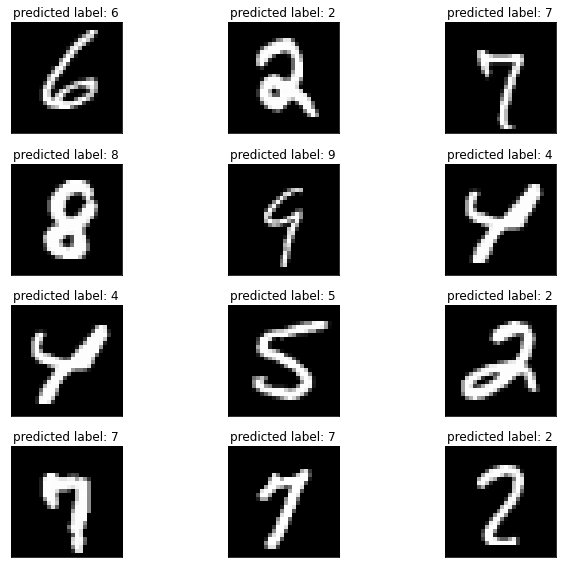

In [ ]:
# Visualize the predictions

# load the model from disk
svm_model = pickle.load(open('svm_model', 'rb'))

# make predictions
y_pred = svm_model.predict(x_eval)

# visualise predictions
vis_predictions(x_eval, y_pred, len(y_pred))


### 2.2.6: Summary


The hyper parameters that we tried to tune were the C and the Gamma. Additionally, we’d also trained polynomial models of different order to evaluate the influence of C and Gamma. 

**Best model**
The best model that we could train was with an RBF kernel, gamma = 0.001 and C = 10. Below in the "Observation" we've written down why we think this was the most optimal model. 

**Observations**


**Observation #1**
From the RBF kernal plots below, it is clear that increasing the value of C when Gamma values are low has a good increase in accuracy of the prediction however when the gamma values are higher the effect of C is minimal. 
Inference - For larger values of gamma, the influence of C is very insignificant.
Smaller the gamma, the more effect C can have in penalizing wrong classifications. 

**Observation #2**

Higher the degree of the polynomial means the fit is tighter however doesn't generalize well and this is seen in the loss of accuracy. 

# 2.3: Model [M3] (Neural Networks): Convolutional Neural Network (25 points)



Convolutional Neural Networks is a special kind of Network which is mostly used for processing images and extracting features from them.

Major advantage of Convolutional Neural Networks(CNN) over Fully Connected Network(FCN) is CNN are autonomous and memory efficient due to using convolutional layer and pooling operations which reduces the image size for processing and lastly, also helps in faster computation.

Considering its advantages over FCN, we choose CNN to classify MNIST images.


### 2.3.1: Hyper-parameters

Following are the hyperparameters used for CNN:

**Epochs:** It defines the number of times the training process takes place. Usually higher epochs means better accuracy but the memory requirements also increases.

**Batch Size:**: Batch Size refers to the number of samples given after which the update is applied. Here we have choosen 64 as a train batch size and 1000 as test batch size as testing requires less updates in parameters.

**Learning Rate:**: Learning rate defines how fast the parameters are updated. Choosing a optimum learning rate is crucial as slow learning rate causes small steps and require higher memory and faster learning rate can cause jumping of values which causes higher time of convergence.

**Momentum:** This parameter helps to identify the correct direction based on the past outputs and helps to achieve faster results due to less oscillations.

**Dropout:**  Dropout refers to the probability by which the nodes are dropped to avoid overfitting and increasing overall accuracy of the model.


In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate_1 = 0.01
learning_rate_2=  0.05
momentum_1 = 0.5
momentum_2 = 0.25

log_interval = 10

### 2.3.2: Data Preprocessing


In [ ]:
#torchvision dataloaders to download MNIST dataset.

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/MLCysec/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/MLCysec/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)





In [ ]:
test_img = enumerate(test_loader)
batch_idx, (test_img_data, test_img_targets) = next(test_img)


### 2.3.3: Model

Here we define two networks:

1. The first model has a dropout with a probability of 10%.
2. The second model has no dropout.

The CNN network has following layers:    

1. Convolutional Layer: This is the two layer which is used to extract feature using filter and is followed by max pooling layer to reduce the input size.

2. Max Pooling layer: After convolutional layer to reduce input size.

2. Dropout Layer: This layer helps to avoid overfitting by defining a probability of dropping some nodes to maintain generalisation.

3. Fully Connected Layer: This layer helps to learn the feature for the images.

4. Activation function: This function is used to add some non-linearity. Here we use ReLu function after every layer.

In [ ]:
# Model with dropout probability of 0.1
class Net_1(nn.Module):
    def __init__(self):
        super(Net_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p=0.10)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)


# Model with no dropout
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

### 2.3.4: Fit Model


In [ ]:
#defining networks and initialisating optimizers for the networks by defining 
#the network parameters, learning rate and momentum.

network1 = Net_1()
optimizer1 = optim.SGD(network1.parameters(), lr=learning_rate_1, momentum=momentum_1)

network2 = Net_2()
optimizer2 = optim.SGD(network2.parameters(), lr=learning_rate_2,momentum=momentum_2)

network3 = Net_1()
optimizer3 = optim.SGD(network3.parameters(), lr=learning_rate_1,momentum=momentum_1)

network4 = Net_2()
optimizer4 = optim.SGD(network4.parameters(), lr=learning_rate_2,momentum=momentum_2)

In [ ]:
#defining list to save training and testing loss for future evaluation.
train_losses_1 = []
train_counter_1 = []
accuracy_1=[]
test_losses_1 = []
test_counter_1 = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

train_losses_2 = []
train_counter_2 = []
accuracy_2=[]
test_losses_2 = []
test_counter_2 = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

train_losses_3 = []
train_counter_3 = []
accuracy_3=[]
test_losses_3 = []
test_counter_3 = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

train_losses_4 = []
train_counter_4 = []
accuracy_4=[]
test_losses_4 = []
test_counter_4 = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
#Training function for all networks

def train1(epoch):
  network1.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer1.zero_grad()
    output = network1(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer1.step()
    if batch_idx % log_interval == 0:
      print('Network 1:Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses_1.append(loss.item())
      train_counter_1.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network1.state_dict(), "model_1.pth")
      torch.save(optimizer1.state_dict(), "model_1.pth")

def train2(epoch):
  network2.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer2.zero_grad()
    output = network2(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer2.step()
    if batch_idx % log_interval == 0:
      print('Network 2:Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses_2.append(loss.item())
      train_counter_2.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network2.state_dict(), "model_2.pth")
      torch.save(optimizer2.state_dict(), "model_2.pth")

def train3(epoch):
  network3.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer3.zero_grad()
    output = network3(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer3.step()
    if batch_idx % log_interval == 0:
      print('Network 3:Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses_3.append(loss.item())
      train_counter_3.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network3.state_dict(), "model_3.pth")
      torch.save(optimizer3.state_dict(), "model_3.pth")

def train4(epoch):
  network4.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer4.zero_grad()
    output = network4(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer4.step()
    if batch_idx % log_interval == 0:
      print('Network 4 :Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses_4.append(loss.item())
      train_counter_4.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network4.state_dict(), "model_4.pth")
      torch.save(optimizer4.state_dict(), "model_4.pth")



In [ ]:
#Testing function for all networks

def test1():
  network1.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network1(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  
  accuracy= correct/len(test_loader.dataset)
  accuracy_1.append(accuracy)
  test_loss /= len(test_loader.dataset)
  test_losses_1.append(test_loss)
  print('\n Network 1:Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  
def test2():
  network2.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network2(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  
  accuracy= correct/len(test_loader.dataset)
  accuracy_2.append(accuracy)
  test_loss /= len(test_loader.dataset)
  test_losses_2.append(test_loss)
  print('\n Network 2: Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

def test3():
  network3.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network3(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  
  accuracy= correct/len(test_loader.dataset)
  accuracy_3.append(accuracy)
  test_loss /= len(test_loader.dataset)
  test_losses_3.append(test_loss)
  print('\n Network 3: Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

def test4():
  network4.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network4(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  
  accuracy= correct/len(test_loader.dataset)
  accuracy_4.append(accuracy)
  test_loss /= len(test_loader.dataset)
  test_losses_4.append(test_loss)
  print('\n Network 4: Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


In [ ]:
#Initialising epoch wise training and testing of all networks.

for epoch in range(1, n_epochs + 1):
  train1(epoch)
  test1()
  train2(epoch)
  test2()
  train3(epoch)
  test3()
  train4(epoch)
  test4()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Network 1:Train Epoch: 1 [0/60000 (0%)]	Loss: 2.281600
Network 1:Train Epoch: 1 [640/60000 (1%)]	Loss: 2.264225
Network 1:Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.239150
Network 1:Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.243186
Network 1:Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.221895
Network 1:Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.184725
Network 1:Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.134724
Network 1:Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.058065
Network 1:Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.962799
Network 1:Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.924300
Network 1:Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.741435
Network 1:Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.530622
Network 1:Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.413238
Network 1:Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.702578
Network 1:Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.136526
Network 1:Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.036329
Network 1:Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.931346
Network 1

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



 Network 1:Test set: Avg. loss: 0.1530, Accuracy: 9527/10000 (95%)

Network 2:Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327481


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Network 2:Train Epoch: 1 [640/60000 (1%)]	Loss: 2.267729
Network 2:Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.178240
Network 2:Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.956831
Network 2:Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.725529
Network 2:Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.606754
Network 2:Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.368178
Network 2:Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.081724
Network 2:Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.015691
Network 2:Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.080145
Network 2:Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.786434
Network 2:Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.898096
Network 2:Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.907557
Network 2:Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.906904
Network 2:Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.952691
Network 2:Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.128376
Network 2:Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.655248
Network 2:Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.694664
Netw

### 2.3.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

For evaluation we have four models:                       

1. Model 1: Uses Network 1 with a dropout of 0.1 with the hyperparameters learning rate 1 and momentum 1.

2. Model 2: Uses Network 1 with a dropout of 0.1 with the hyperparameters learning rate 2 and momentum 2.

3. Model 3: Uses Network 2 with a no dropout with the hyperparameters learning rate 1 and momentum 1.

3. Model 4: Uses Network 2 with a no dropout with the hyperparameters learning rate 2 and momentum 2.


Text(0, 0.5, 'negative log likelihood loss')

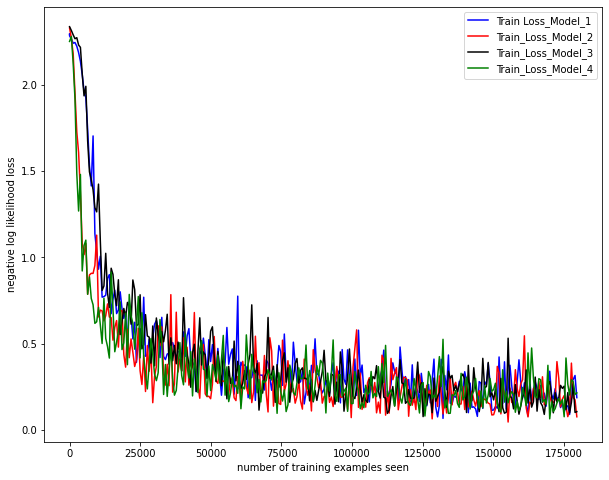

In [ ]:
# Here plot epoch (# passes over training data) and loss
fig = plt.figure()
plt.plot(train_counter_1, train_losses_1, color='blue')
plt.plot(train_counter_2, train_losses_2, color='red')
plt.plot(train_counter_3, train_losses_3, color='black')
plt.plot(train_counter_4, train_losses_4, color='green')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss_Model_1', 'Train_Loss_Model_2','Train_Loss_Model_3','Train_Loss_Model_4'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')


Text(0, 0.5, 'negative log likelihood loss')

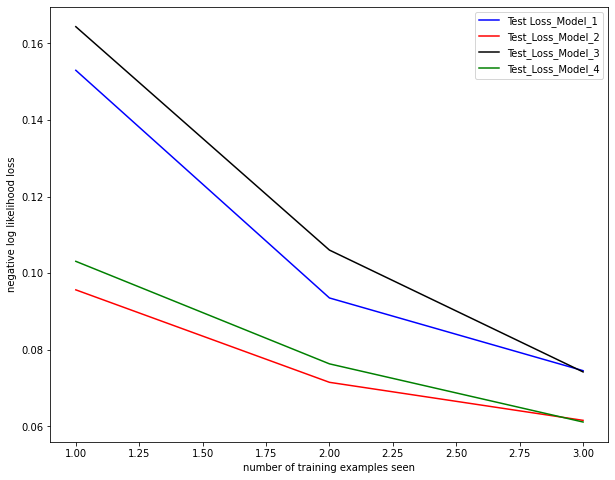

In [ ]:
# Plot of testing loss of all models
fig = plt.figure()
plt.plot([1,2,3],test_losses_1, color='blue')
plt.plot([1,2,3],test_losses_2, color='red')
plt.plot([1,2,3],test_losses_3, color='black')
plt.plot([1,2,3],test_losses_4, color='green')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Test Loss_Model_1', 'Test_Loss_Model_2','Test_Loss_Model_3','Test_Loss_Model_4'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')


Text(0, 0.5, 'Accuracy')

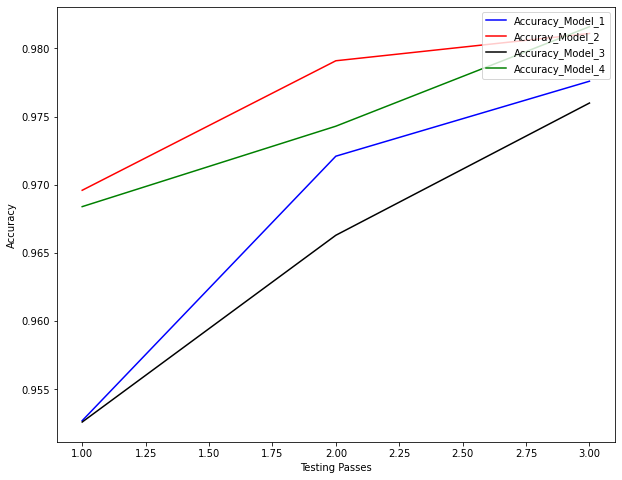

In [ ]:
# Here plot epoch and accuracy over val/test set
accuracy1= np.array(accuracy_1)
accuracy2= np.array(accuracy_2)
accuracy3= np.array(accuracy_3)
accuracy4= np.array(accuracy_4)

fig = plt.figure()
plt.plot([1,2,3], accuracy1, color='blue')
plt.plot([1,2,3], accuracy2, color='red')
plt.plot([1,2,3], accuracy3, color='black')
plt.plot([1,2,3], accuracy4, color='green')
#plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Accuracy_Model_1', 'Accuray_Model_2','Accuracy_Model_3','Accuracy_Model_4'], loc='upper right')
plt.xlabel('Testing Passes')
plt.ylabel('Accuracy')


In [ ]:
# Here report the score for the best model

print("\n Maximum Accuracy achieved by all four models individually are: \n")
max_accuracy= [max(accuracy1), max(accuracy2),max(accuracy3),max(accuracy4)]
print(max_accuracy)

print("\n Maximum Accuracy amongst all four models are :\n")
best_accuracy= max(max_accuracy)
print(best_accuracy)

print("\n Model number with max accuracy:")
best_accuracy_index = max_accuracy. index(best_accuracy)
print(best_accuracy_index)


 Maximum Accuracy achieved by all four models individually are: 

[0.9776, 0.9811, 0.976, 0.9816]

 Maximum Accuracy amongst all four models are :

0.9816

 Model number with max accuracy:
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


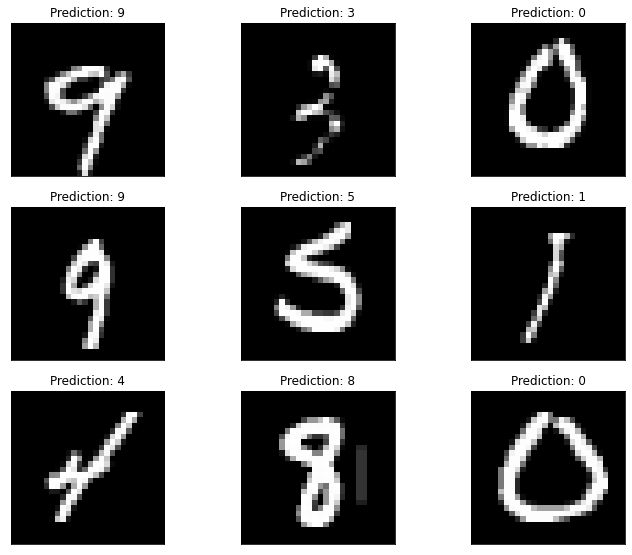

In [ ]:
# Visualize the predictions for Network 1
with torch.no_grad():
  output_imgs = network1(test_img_data)


fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(test_img_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(output_imgs.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


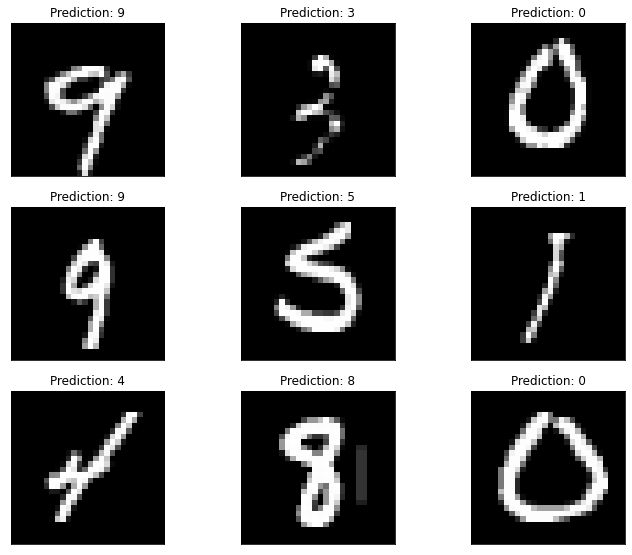

In [ ]:
# Visualize the predictions for Network 2
with torch.no_grad():
  output_imgs = network2(test_img_data)


fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(test_img_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(output_imgs.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


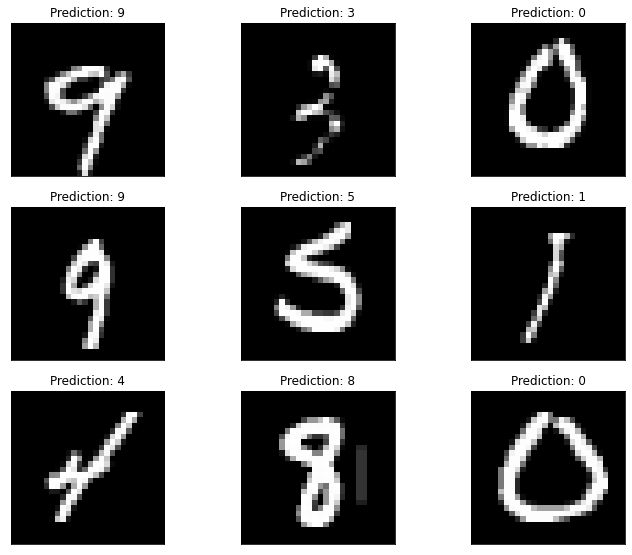

In [ ]:
# Visualize the predictions for Network 3
with torch.no_grad():
  output_imgs = network3(test_img_data)


fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(test_img_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(output_imgs.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


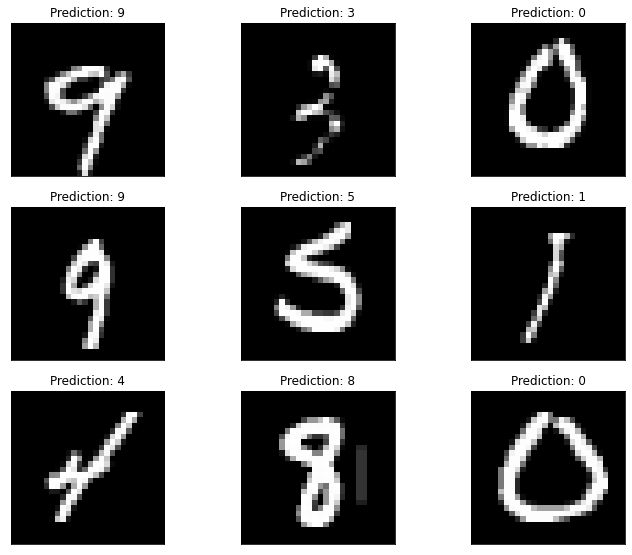

In [ ]:
# Visualize the predictions for Network 4
with torch.no_grad():
  output_imgs = network4(test_img_data)


fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(test_img_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(output_imgs.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])


### 2.3.6: Summary

Here we used four networks with different parameters : 

Model 1: Uses Network 1 with a dropout of 0.1 with the hyperparameters learning rate 1=0.01 and momentum 1=0.5 with accuracy 97.61%

Model 2: Uses Network 1 with a dropout of 0.1 with the hyperparameters learning rate 2=0.05 and momentum 2=0.25 with accuracy 97.99%

Model 3: Uses Network 2 with a no dropout with the hyperparameters learning rate 1=0.01 and momentum 1=0.5 with accuracy 97.69%

Model 4: Uses Network 2 with a no dropout with the hyperparameters learning rate 2=0.05 and momentum 2=0.5 with 97.84%.

Parameters like Learning rate, momentum and dropout are important as they define the speed of convergence, direction of convergence and generalisation respectively.

Other design choices that can affect the networks are choice of optimizer, epochs and batch size.



# 3. Summary (20 points)
The best accuracy achieved by the model are as follows:    

1. KNN with K=1: 95%
2. SVM with RBF Kernel : 92%
3. CNN with a dropout of 0.1 with the hyperparameters learning rate 2=0.05 and momentum 2=0.25 : 97.99%


**Which methods work better than the rest and why?**

As we can see that the accuracy achieved by CNN is highest in comparison to KNN and SVM. 

**Which hyper-parameters and design-choices were important in each of your methods?**

***K Nearest Neighbors:*** The number of neighbors (k) is the most important hyperparameter.

***SVM:*** For an RBF Kernel, the value of Gamma is the most important parameter.

***CNN:*** Learning rate, momentum and dropout rate are the most important hyper-paramters.


**Trade-offs between methods, hyper-parameters, design-choices**

The computational and mathematical complexity of CNN is higher than in comparison to the other methods. Thus in our opinion, where computational power and  training time required are not an issue and the application requires more acuracy, CNN should be the first choice. However, if certain misclassifications are allowed KNN would be the best choice due to its simple architecture. SVM can be considered somewhere between KNN and CNN and can be used according to the application.


